Cryptocurrency Data Explorer 

load_and_preprocess_crypto_data: loading data from the dataset and performing data type conversion tasks. 

In addition, it will directly remove data that does not meet the requirements (since any modification to the original data in such a dataset would affect subsequent statistical measurement results). 

In [1]:
import pandas as pd
from datetime import datetime

def load_and_preprocess_crypto_data(file_path='crypto-markets.csv'):
    """
    Load and preprocess cryptocurrency market data
    """
    # Load the data
    df = pd.read_csv(file_path)
    
    # Convert date columns to Python datetime objects.
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Delete rows with invalid dates 
    df = df.dropna(subset=['date'])
    
    print(f"load {len(df)} data")
    return df

select_currencies：Implemented the functionality to filter data from the dataset based on user input, allowing users to mix the use of name and symbol for filtering. To handle errors caused by incorrect user input, corresponding input checks have been set up: 
1. When all input is correct, proceed with subsequent operations.
2. When part of the input is incorrect, save the correct part and ask the user if they want to modify the incorrect part.
3. When all input is incorrect, directly ask the user what needs to be modified.

Because the selection result of this function will directly affect the display effect of the subsequent K-line chart, it is recommended to include 10MT to achieve the best result.

In [2]:
def select_currencies(df):
    """
    Select currencies from the dataset based on user input of symbol or name.
    Returns the filtered DataFrame with error handling.
    """
    # Obtain a unique list of currencies (using a combination of symbol and name for easier identification)
    currency_info = df[['symbol', 'name']].drop_duplicates().sort_values('symbol')
    print("\nAvailable currencies (only showing the first 10):")
    print(currency_info.head(10).to_string(index=False))
    print(f"\nThe dataset has {len(currency_info)} kinds of currencies.")

    while True:
        # Ask user to input the currencies they want to select
        print("\nPlease input the currencies you want by symbol or name, separated by commas (e.g., BTC,ETH):")
        user_input = input().strip()
        
        if not user_input:
            print("You have not selected any currency. The entire dataset will be returned!")
            return df
        
        selected_inputs = [s.strip().upper() for s in user_input.split(',')]
        
        # Get unique symbols and names from the dataset for validation
        valid_symbols = set(df['symbol'].str.upper().tolist())
        valid_names = set(df['name'].str.upper().tolist())
        
        # Identify valid and invalid inputs
        valid_selected = []
        invalid_inputs = []
        
        for inp in selected_inputs:
            if inp in valid_symbols or inp in valid_names:
                valid_selected.append(inp)
            else:
                invalid_inputs.append(inp)
        
        # Handle case where all inputs are invalid
        if not valid_selected:
            print(f"Error: None of the inputs '{', '.join(selected_inputs)}' match any currency symbol or name in the dataset.")
            print("Please try again with valid inputs.")
            continue
        
        # Handle case where some inputs are invalid
        if invalid_inputs:
            print(f"Warning: The following inputs do not match any currency: {', '.join(invalid_inputs)}")
            print(f"Valid selections: {', '.join(valid_selected)}")
            
            while True:
                modify_choice = input("Do you want to modify your selection? (y/n): ").strip().lower()
                if modify_choice in ['y', 'yes']:
                    print("Please enter the corrected currency symbols or names, separated by commas:")
                    corrected_input = input().strip()
                    if corrected_input:
                        # Add corrected inputs to the current valid selection
                        corrected_inputs = [s.strip().upper() for s in corrected_input.split(',')]
                        selected_inputs = valid_selected + corrected_inputs
                    break
                elif modify_choice in ['n', 'no']:
                    print("Proceeding with valid selections only...")
                    selected_inputs = valid_selected
                    break
                else:
                    print("Please enter 'y' for yes or 'n' for no.")
        
        # Filter data based on final selected inputs
        mask = df['symbol'].str.upper().isin(selected_inputs) | df['name'].str.upper().isin([s.strip() for s in selected_inputs])
        filtered_df = df[mask]
        
        # If user input nothing
        if not filtered_df.empty:
            # Get unique symbols from the filtered data
            actual_symbols = filtered_df['symbol'].unique()
            print(f"Selected {len(filtered_df)} records, involving currencies: {', '.join(actual_symbols)}")
            return filtered_df
        else:
            print("No matching currencies were found. Please check if the entered symbols or names are correct!")
            continue

1. Load dataset and filter data

2. User can save the filtered data to selected_crypto_data.csv if they want to.

In [3]:
file_path = 'crypto-markets.csv'
    
    # load and preprocess crypto data
df = load_and_preprocess_crypto_data(file_path)
    
    # Let user select the currencies
selected_df = select_currencies(df)
    
    # Show the data selected(just top 5)
print("\nPreview of filtered data：")
print(selected_df.head())
    
    # User can save the filtered data if they want.
save = input("\nDo you want to save the data you just selected to 'selected_crypto_data.csv'？(y/n): ").strip().lower()
if save == 'y':
    selected_df.to_csv('selected_crypto_data.csv', index=False)
    print("Successfully saved data into 'selected_crypto_data.csv'")

load 679183 data

Available currencies (only showing the first 10):
symbol       name
   $$$      Money
  10MT  10M Token
  1337      Elite
   1ST FirstBlood
 2GIVE      2GIVE
   300  300 Token
    42    42-coin
   611  SixEleven
   808    808Coin
   888   OctoCoin

The dataset has 1513 kinds of currencies.

Please input the currencies you want by symbol or name, separated by commas (e.g., BTC,ETH):


 BTC,ETH,XRP,LTC,BNB,10MTT


Valid selections: BTC, ETH, XRP, LTC, BNB


Do you want to modify your selection? (y/n):  Y


Please enter the corrected currency symbols or names, separated by commas:


 10MT


Selected 6352 records, involving currencies: BTC, ETH, XRP, LTC, BNB, 10MT

Preview of filtered data：
      slug symbol     name       date  ranknow    open    high     low  \
0  bitcoin    BTC  Bitcoin 2013-04-28        1  135.30  135.98  132.10   
1  bitcoin    BTC  Bitcoin 2013-04-29        1  134.44  147.49  134.00   
2  bitcoin    BTC  Bitcoin 2013-04-30        1  144.00  146.93  134.05   
3  bitcoin    BTC  Bitcoin 2013-05-01        1  139.00  139.89  107.72   
4  bitcoin    BTC  Bitcoin 2013-05-02        1  116.38  125.60   92.28   

    close  volume      market  close_ratio  spread  
0  134.21       0  1500520000       0.5438    3.88  
1  144.54       0  1491160000       0.7813   13.49  
2  139.00       0  1597780000       0.3843   12.88  
3  116.99       0  1542820000       0.2882   32.17  
4  105.21       0  1292190000       0.3881   33.32  



Do you want to save the data you just selected to 'selected_crypto_data.csv'？(y/n):  Y


Successfully saved data into 'selected_crypto_data.csv'


3. Calculate returns using the exchange rate ratios of two consecutive days.

In [4]:
import numpy as np

def calculate_daily_returns(df):
    """Calculate daily returns for each token"""
    df = df.sort_values(['symbol', 'date'])
    df['daily_return'] = df.groupby('symbol')['close'].pct_change()
    return df

4. Calculate the statistics of each selected data
   
   including close_mean;close_std;volume_mean;volume_std;daily_return_mean;volatility;total_days

In [5]:
def basic_statistics(selected_df, selected_symbols=None):
    """
    Calculate the statistics of the selected token's closing price, daily return, and trading volume.
    """
    df_with_returns = calculate_daily_returns(selected_df.copy())
    
    symbols = selected_symbols if selected_symbols is not None else df_with_returns['symbol'].unique()
    
    stats = df_with_returns.groupby('symbol').agg(
        close_mean=('close', 'mean'),
        close_std=('close', 'std'),
        volume_mean=('volume', 'mean'),
        volume_std=('volume', 'std'),
        daily_return_mean=('daily_return', 'mean'),
        volatility=('daily_return', 'std'),  
        total_days=('date', 'count')
    ).round(6)
    
    print("\n The basic statistics of the selected data:")
    display(stats)
    return stats

5. Calculate the correlation and volatility

   for the correlation part I use the Pearson correlation coefficient.

   This correlation need 2 kind of data, so before calculate the number I check whether the list has only 2 kind of data.

   to make the combine correct the inner merge should be taken

In [6]:
def correlation_and_volatility(df_full, symbol_list):
    """
    If exactly two tokens are selected, calculate their daily return correlation and respective volatilities. 
    Use the full dataset df_full to ensure more accurate time alignment.
    """
    # Correlation analysis requires 2 kind of data
    if len(symbol_list) != 2:
        print("\n Correlation analysis requires exactly two tokens to be selected. Skip this step.")
        return None
    
    sym1, sym2 = symbol_list
    df_ret = calculate_daily_returns(df_full.copy())
    
    r1 = df_ret[df_ret['symbol'] == sym1][['date', 'daily_return']].set_index('date').rename(columns={'daily_return': sym1})
    r2 = df_ret[df_ret['symbol'] == sym2][['date', 'daily_return']].set_index('date').rename(columns={'daily_return': sym2})

    # Use inner to merged two kind of data, make sure the date of data is same.
    merged = r1.join(r2, how='inner')

    # Correlation need at least two data points from two kind of data.
    if merged.empty or merged.shape[0] < 2:
        print(f"\n  {sym1} and {sym2} do not have enough common trading days to calculate the correlation.")
        return None
    
    # The diagonal of the Pearson correlation coefficient matrix represents the correlation coefficient of each variable with itself.
    corr = merged.corr().iloc[0, 1]
    
    # Measure volatility using sample standard deviation
    vol1 = merged[sym1].std()
    vol2 = merged[sym2].std()

    # Show the result
    print(f"\n {sym1} vs {sym2} :")
    print(f"- Volatility（{sym1}）: {vol1:.6f}")
    print(f"- Volatility（{sym2}）: {vol2:.6f}")
    print(f"- Daily return Pearson correlation coefficient: {corr:.6f}")
    
    return {'volatility_{}'.format(sym1): vol1,
            'volatility_{}'.format(sym2): vol2,
            'correlation': corr}

6. Calculate the top 5 tokens with the highest average trading volume

In [7]:
def top5_avg_volume(df_full):
    """
    Based on the complete dataset, identify the top 5 tokens with the highest average trading volume.
    """
    top5 = (df_full.groupby('symbol')['volume']
                   .mean()
                   .sort_values(ascending=False)
                   .head(5))
    print("\n The top 5 tokens with the highest average trading volume in the entire market:")
    display(top5.to_frame(name='avg_volume'))
    return top5

In [8]:
# Extract the token symbols selected by the user from selected_df
selected_symbols = sorted(selected_df['symbol'].unique().tolist())

print(f" The token currently under analysis: {selected_symbols}")

# Basic statistics
stats = basic_statistics(selected_df, selected_symbols)

# Correlation and volatility of two tokens (only when two are selected)
corr_result = correlation_and_volatility(df, selected_symbols)

# Top 5 average trading volumes in the entire market (using df)
top5 = top5_avg_volume(df)

 The token currently under analysis: ['10MT', 'BNB', 'BTC', 'ETH', 'LTC', 'XRP']

 The basic statistics of the selected data:


,close_mean,close_std,volume_mean,volume_std,daily_return_mean,volatility,total_days
symbol,,,,,,,
10MT,0.005952,0.005446,1.026600e+03,2.864456e+03,0.147692,0.698190,105
BNB,4.213576,5.358105,4.870015e+07,8.453536e+07,0.031774,0.154874,196
BTC,1417.806115,2877.000892,7.939406e+08,2.715462e+09,0.003270,0.044989,1745
ETH,135.786323,248.844934,5.077583e+08,1.195958e+09,0.009470,0.080037,914
LTC,19.073742,44.653159,9.178776e+07,3.456976e+08,0.004482,0.077176,1745
XRP,0.089957,0.309169,1.336993e+08,6.935951e+08,0.006412,0.093143,1647



 Correlation analysis requires exactly two tokens to be selected. Skip this step.

 The top 5 tokens with the highest average trading volume in the entire market:


,avg_volume
symbol,
BCH,1.082411e+09
BTC,7.939406e+08
ETH,5.077583e+08
EOS,2.830620e+08
TRX,2.761180e+08


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

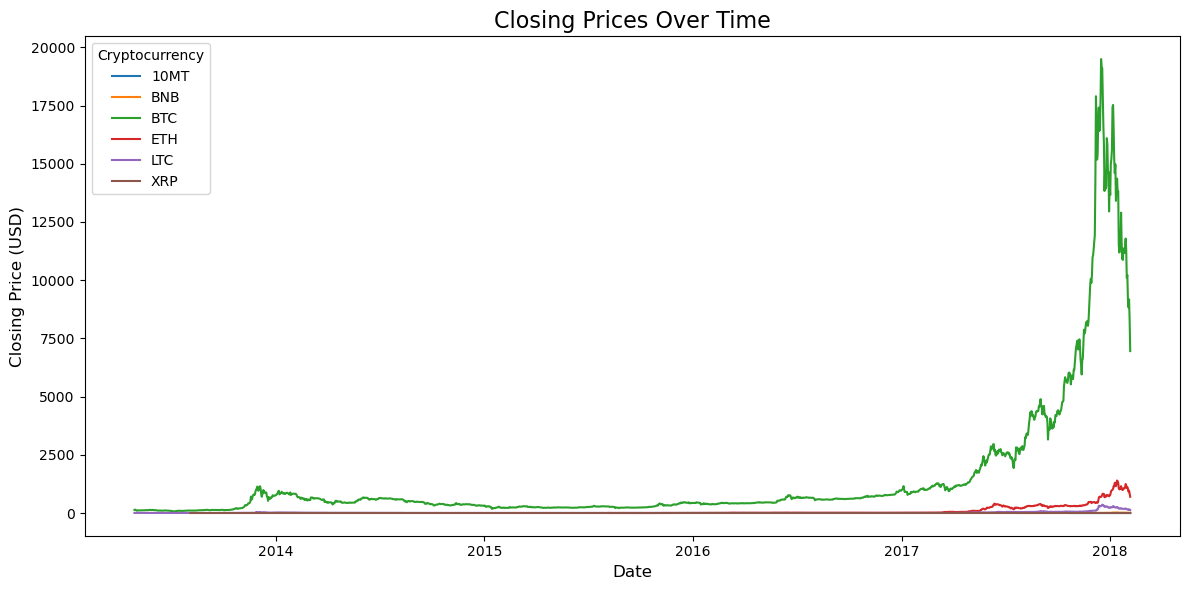

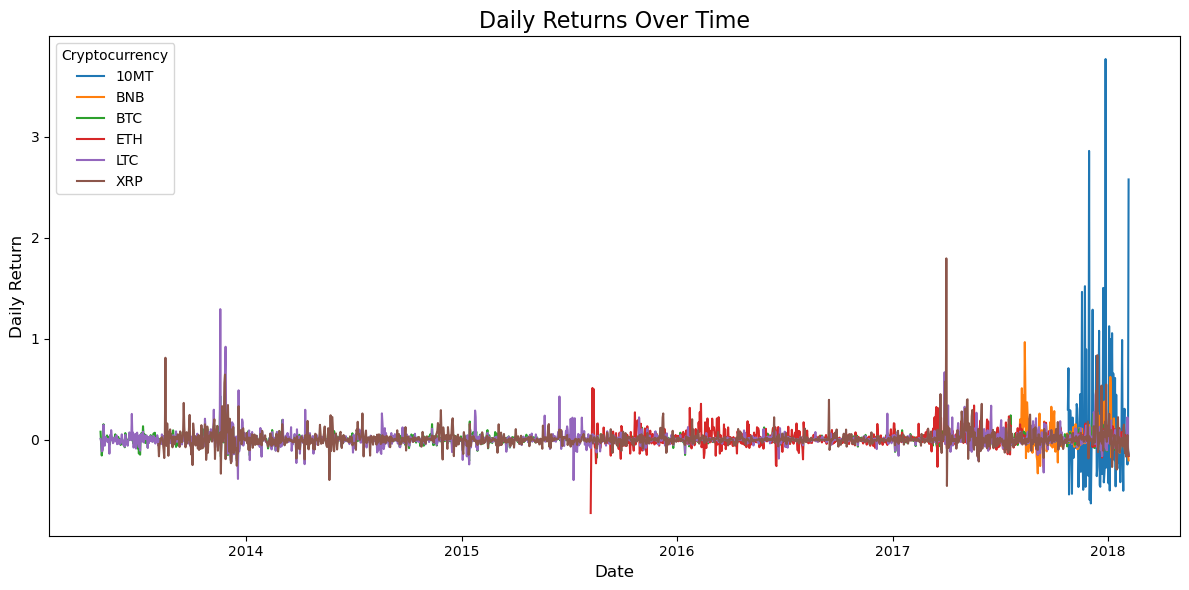

In [10]:
def calculate_daily_returns(df):
    df = df.sort_values(['symbol', 'date'])
    df['daily_return'] = df.groupby('symbol')['close'].pct_change()
    return df

selected_df = calculate_daily_returns(selected_df.copy())

# Figure of Closing Prices Over Time
plt.figure(figsize=(12, 6))
for symbol in selected_symbols:
    data = selected_df[selected_df['symbol'] == symbol]
    plt.plot(data['date'], data['close'], label=symbol)
plt.title('Closing Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend(title='Cryptocurrency')
plt.tight_layout()
plt.show()


# Figure of daily returns
plt.figure(figsize=(12, 6))
plt.title('Daily Returns Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Return', fontsize=12)

for symbol in selected_symbols:
    data = selected_df[selected_df['symbol'] == symbol]
    # Plot the daily return of each symbol
    plt.plot(data['date'], data['daily_return'], label=symbol)

plt.legend(title='Cryptocurrency') 
plt.tight_layout() 
plt.show()

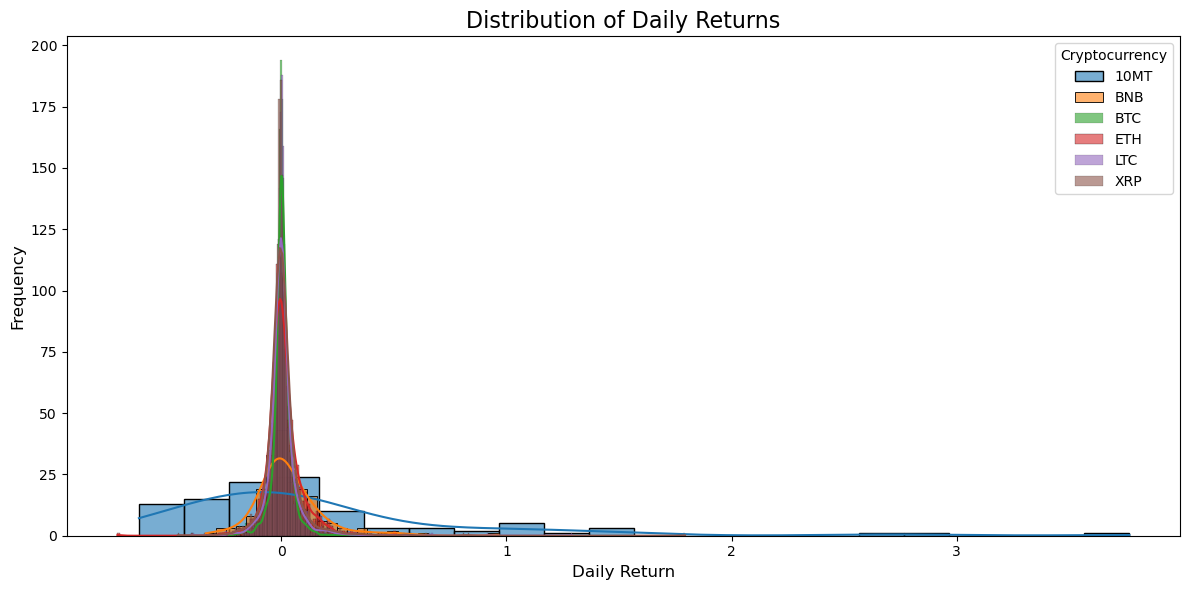

In [11]:
# Figure of the distribution of daily returns
plt.figure(figsize=(12, 6))
for symbol in selected_symbols:
    returns = selected_df[selected_df['symbol'] == symbol]['daily_return'].dropna()
    sns.histplot(returns, kde=True, label=symbol, alpha=0.6)
plt.title('Distribution of Daily Returns', fontsize=16)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Cryptocurrency')
plt.tight_layout()
plt.show()

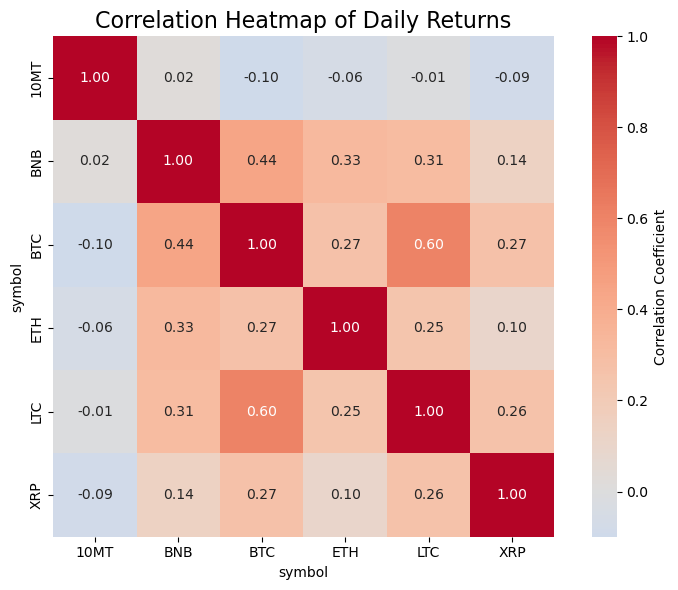

In [12]:
# Figure of the Correlation Heatmap of Daily Returns
selected_df = calculate_daily_returns(selected_df.copy())
returns_wide = (selected_df[['date', 'symbol', 'daily_return']]
                .dropna()
                .pivot(index='date', columns='symbol', values='daily_return'))
#Correlation heatmap requires at least two cryptocurrencies with overlapping dates
if not returns_wide.empty and returns_wide.shape[1] >= 2:
    corr_matrix = returns_wide.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
    plt.title('Correlation Heatmap of Daily Returns', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print(" Correlation heatmap requires at least two cryptocurrencies with overlapping dates. Skipped.")

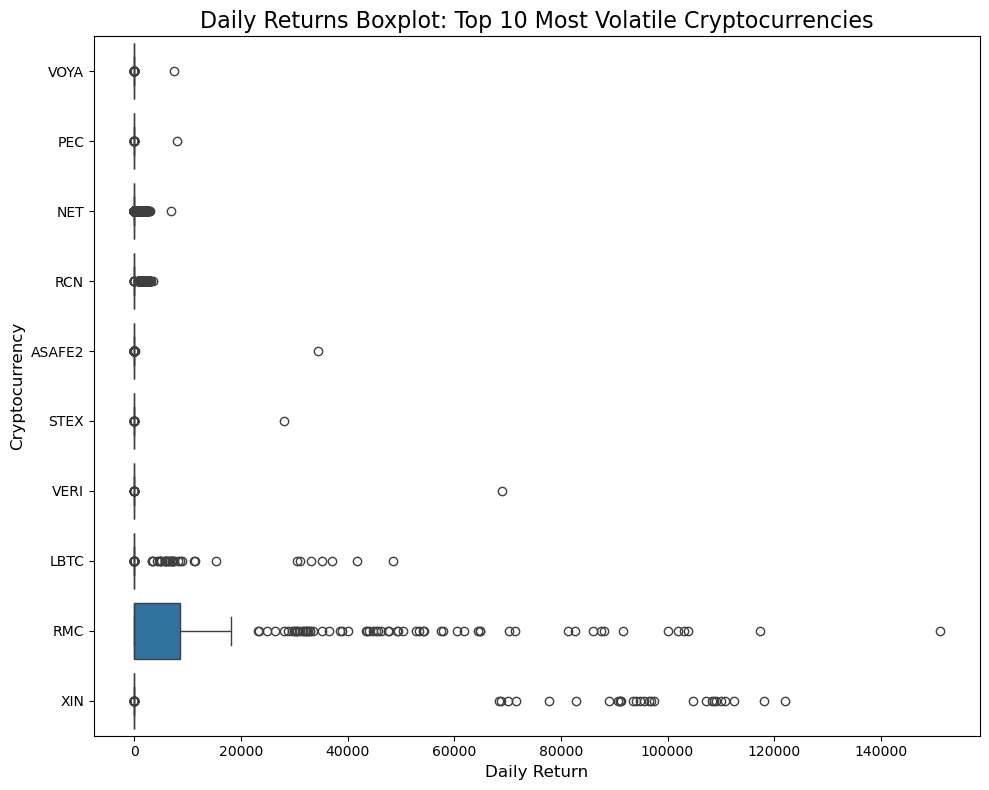

In [13]:
#Box plot of top 10 most volatile cryptocurrencies
df_ret = calculate_daily_returns(df.copy())
vol_by_symbol = df_ret.groupby('symbol')['daily_return'].std().dropna()
top_vol_symbols = vol_by_symbol.nlargest(10).index

top_vol_data = df_ret[df_ret['symbol'].isin(top_vol_symbols)].copy()
top_vol_data['symbol'] = pd.Categorical(top_vol_data['symbol'], categories=top_vol_symbols[::-1])

plt.figure(figsize=(10, 8))
sns.boxplot(data=top_vol_data, y='symbol', x='daily_return', orient='h')
plt.title('Daily Returns Boxplot: Top 10 Most Volatile Cryptocurrencies', fontsize=16)
plt.xlabel('Daily Return', fontsize=12)
plt.ylabel('Cryptocurrency', fontsize=12)
plt.tight_layout()
plt.show()

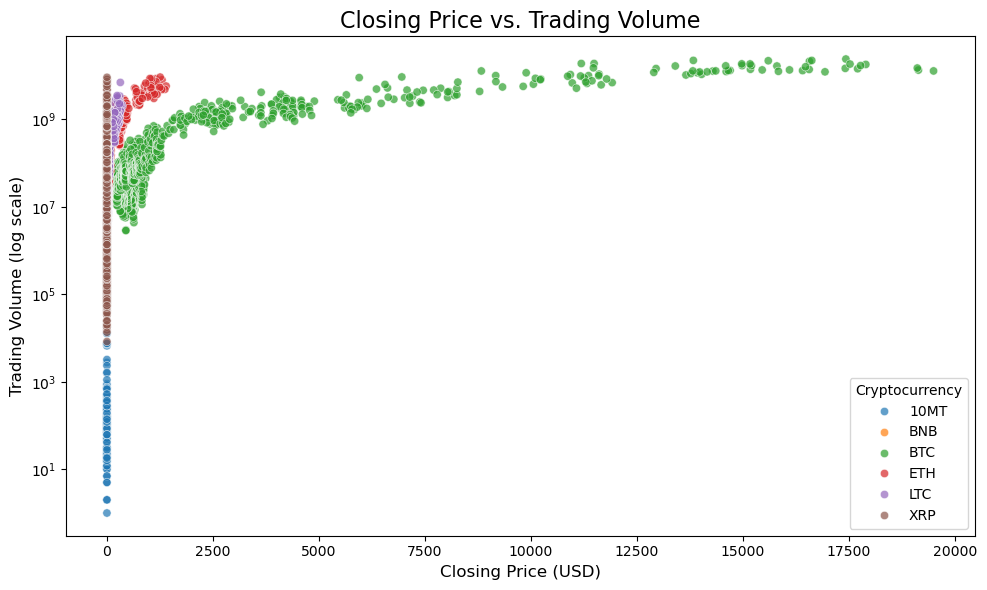

In [14]:
#scatter plot of the 'Closing Price' and 'Trading Volume'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=selected_df, x='close', y='volume', hue='symbol', alpha=0.7)
plt.title('Closing Price vs. Trading Volume', fontsize=16)
plt.xlabel('Closing Price (USD)', fontsize=12)
plt.ylabel('Trading Volume (log scale)', fontsize=12)
plt.yscale('log')
plt.legend(title='Cryptocurrency')
plt.tight_layout()
plt.show()

Additional charts: Provided a radar chart and a chart more closely related to the financial market, including simple moving averages, candlesticks, and channel indicators.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

Maximum drawdown is an important metric for measuring investment loss risk
representing the decline from the highest value of an asset to the subsequent lowest value within a selected time period.

In [16]:
def calculate_max_drawdown(returns):
    """Calculate maximum drawdown from a series of cumulative returns.""" 
    #Convert the return series into a cumulative return series
    cum_returns = (1 + returns).cumprod()
    #The best investment performance achieved up to any given point
    running_max = cum_returns.cummax()
    #Obtain the drawdown series by dividing the difference between the cumulative return and the rolling maximum by the rolling maximum.
    drawdown = (cum_returns - running_max) / running_max
    #Find the minimum drawdown value at all time points, that is, the maximum drawdown.
    return drawdown.min()

In [17]:
def risk_return_metrics(df, selected_symbols, annualization_factor=365):
    """
    Compute risk-return metrics for selected cryptocurrencies.
    """
    metrics = {}
    global_max_days = df.groupby('symbol')['date'].count().max()  # for coverage normalization

    for symbol in selected_symbols:
        data = df[df['symbol'] == symbol].copy()
        data = data.sort_values('date')
        returns = data['daily_return'].dropna()

        if len(returns) < 2:
            continue

        # Annualized return and volatility
        # This is the standard annualization method in finance, assuming that the returns are independently and identically distributed.
        annual_return = returns.mean() * annualization_factor
        annual_vol = returns.std() * sqrt(annualization_factor)

        # Sharpe ratio (risk-free rate = 0)
        # How much excess return does a portfolio generate for each unit of total risk it takes on.
        sharpe = annual_return / annual_vol if annual_vol != 0 else 0

        # Max drawdown
        max_dd = calculate_max_drawdown(returns)

        # Coverage (trading days / max trading days in dataset)
        coverage = len(data) / global_max_days

        metrics[symbol] = {
            'Annualized Return': annual_return,
            'Annualized Volatility': annual_vol,
            'Max Drawdown': abs(max_dd),  # make positive for radar plot
            'Sharpe Ratio': sharpe,
            'Data Coverage': coverage
        }
        #print( metrics[symbol])

    return metrics

Radar charts are the best way to comprehensively reflect the performance of a test sample across different indicators. 

I used annualized return, maximum drawdown, Sharpe ratio, data coverage, and annualized volatility to measure the performance of currencies.

For a radar chart of all positive indicators, the area size is positively correlated with the quality of the currency. 

However, in the currency market, higher volatility often means higher returns, so no inverted normalization was applied to annualized volatility.

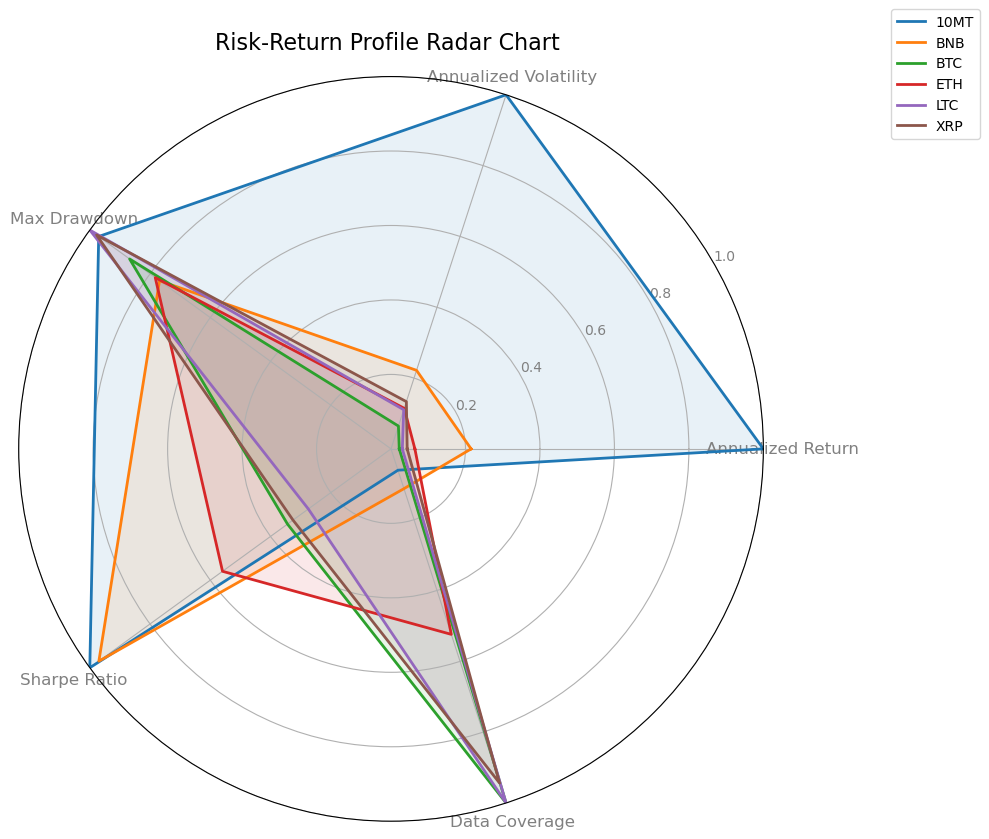

In [18]:
def plot_risk_return_radar(metrics):
    """
    Plot a radar chart comparing risk-return metrics across selected cryptos.
    """
    categories = list(next(iter(metrics.values())).keys())
    N = len(categories)

    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # close the loop

    plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], categories, color='grey', size=12)

    # Draw ylabels
    ax.set_rlabel_position(30)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
    plt.ylim(0, 1)

    # Normalize each metric to [0, 1] for fair radar comparison
    all_vals = np.array([list(m.values()) for m in metrics.values()])
    mins = all_vals.min(axis=0)
    maxs = all_vals.max(axis=0)
    ranges = maxs - mins
    ranges[ranges == 0] = 1  # avoid division by zero

    for symbol, values in metrics.items():
        data = np.array(list(values.values()))
        # Due to the high volatility of the cryptocurrency market, min-max normalization is required to prevent exceeding limits.
        # Normalize by global max → max becomes 1
        normalized = data / maxs
        normalized = np.concatenate((normalized, [normalized[0]]))  # close loop
        ax.plot(angles, normalized, linewidth=2, label=symbol)
        ax.fill(angles, normalized, alpha=0.1)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    plt.title("Risk-Return Profile Radar Chart ", size=16, pad=20)
    plt.tight_layout()
    plt.show()

metrics = risk_return_metrics(selected_df, selected_symbols)
if metrics:
    plot_risk_return_radar(metrics)
else:
    print("Not enough data to compute risk-return metrics for the selected cryptocurrencies.")

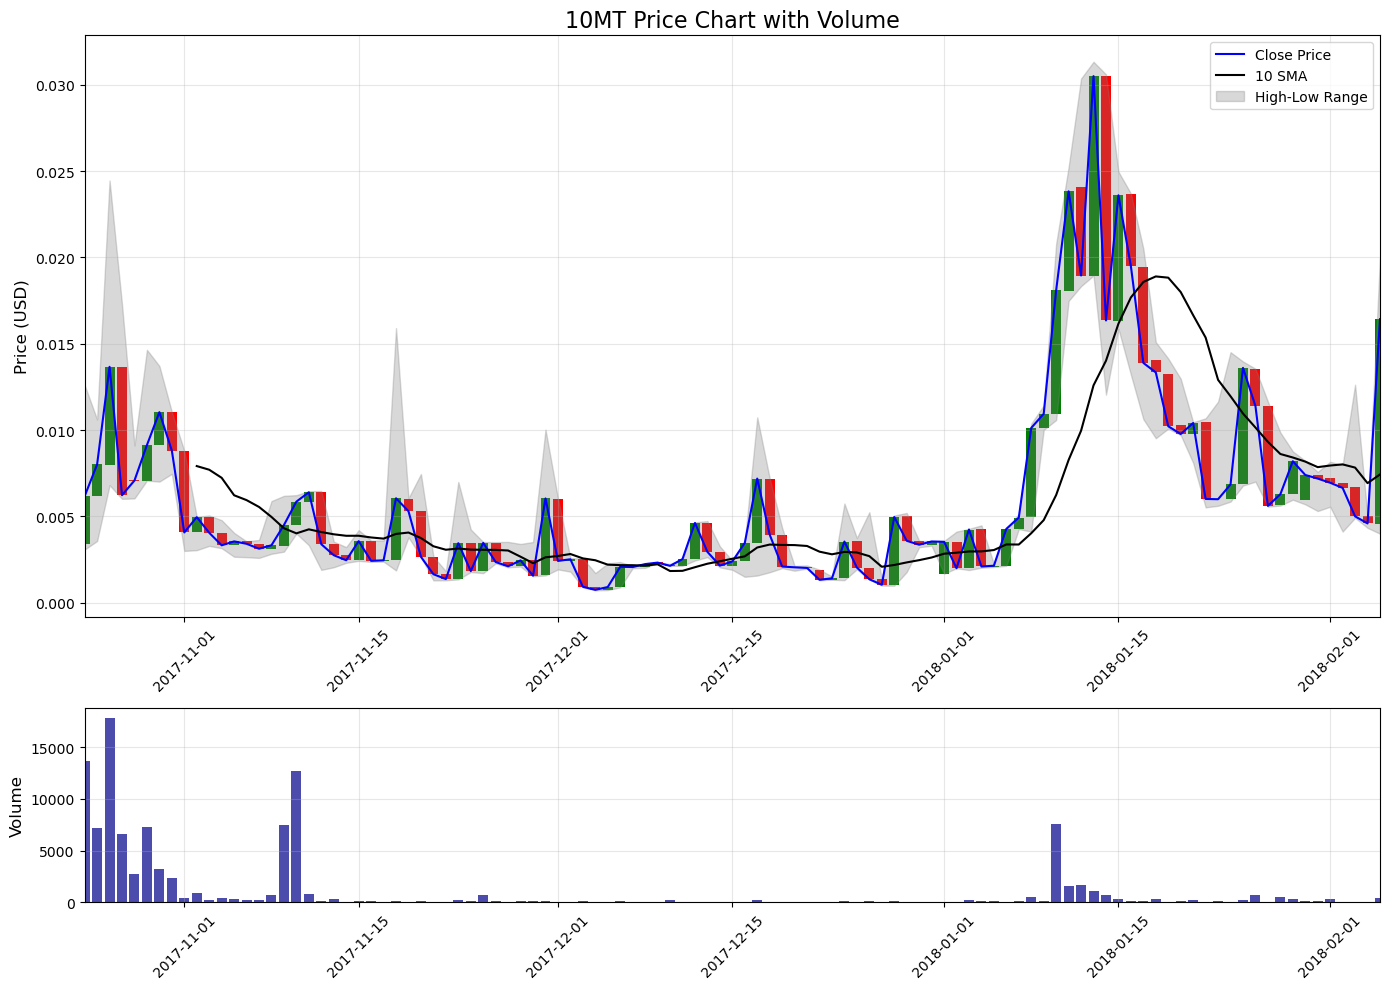

In [19]:
import matplotlib.pyplot as plt
import numpy as np

selected_df = calculate_daily_returns(selected_df.copy())

# Analyze the first currency(Sorted by the dataset)
symbol = selected_symbols[0]  # take the first symbol
data = selected_df[selected_df['symbol'] == symbol].copy()

# Check if this symbol has enough data, at least two data points is needed
if len(data) < 2:
    print(f"Insufficient data for {symbol}")
else:
    # sort to make sure the data of date is correct
    data = data.sort_values('date').reset_index(drop=True)

    # Calculate the simple moving average (SMA)
    window = 10 # 10-day moving average.
    data['sma'] = data['close'].rolling(window=window).mean()

    # Create graphics and subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})
    
    # Draw candlestick (represented by rectangles)
    # If the opening price is higher than the closing price, the price will fall the next day; otherwise, it will rise. 
    # Use different colors for marking.
    colors = ['green' if close > open else 'red' for close, open in zip(data['close'], data['open'])]
    bars = ax1.bar(data['date'], data['close'] - data['open'], bottom=data['open'], color=colors, width=0.8)
    ax1.plot(data['date'], data['close'], label='Close Price', color='blue', linewidth=1.5)
    ax1.plot(data['date'], data['sma'], label=f'{window} SMA', color='black', linewidth=1.5)

    # Add areas for the highest and lowest prices (shaded)
    # Donchian Channel number 
    # Used to analyze potential trading opportunities
    ax1.fill_between(data['date'], data['low'], data['high'], color='gray', alpha=0.3, label='High-Low Range')

    ax1.set_ylabel('Price (USD)', fontsize=12)
    ax1.set_title(f'{symbol} Price Chart with Volume', fontsize=16)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.tick_params(axis='x', rotation=45)

    # The chart below: Volume bar chart
    ax2.bar(data['date'], data['volume'], color='darkblue', alpha=0.7)
    ax2.set_ylabel('Volume', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.tick_params(axis='x', rotation=45)

    # Ensure the X-axes of the two charts are aligned
    ax1.set_xlim(data['date'].min(), data['date'].max())
    ax2.set_xlim(data['date'].min(), data['date'].max())

    plt.tight_layout()
    plt.show()

Training samples: 1200, Features: 66


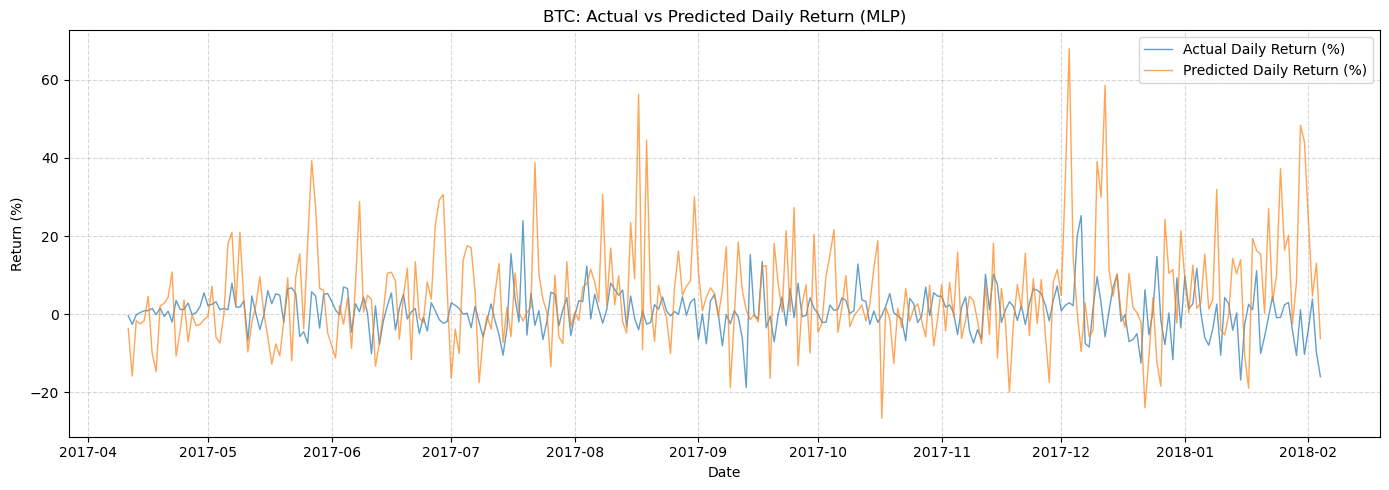


BTC MLP Performance:
  MSE: 0.019995
  MAE: 0.104807
  R² : -5.6055


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings("ignore")

def prepare_mlp_features(df, symbol, lookback=20):
    """
    Preprocess data for MLP
    """
    data = df[df['symbol'] == symbol].copy().sort_values('date').reset_index(drop=True)
    
    # Return if we do not have enough data to train the model
    if len(data) < lookback + 20:
        print(f"Warning: Not enough data for {symbol}")
        return None

    # Preprocess data
    data['return_1'] = data['close'].pct_change()
    
    # Because there may be short-term high volatility, logarithmic calculations need to be used to smooth the function.
    data['log_return'] = np.log(data['close'] / data['close'].shift(1))
    data['high_low_ratio'] = np.where(data['low'] > 0, data['high'] / data['low'], np.nan)
    data['price_range'] = data['high'] - data['low']
    data['volume_change'] = data['volume'].pct_change()
    data['sma_5'] = data['close'].rolling(window=5).mean()
    data['sma_10'] = data['close'].rolling(window=10).mean()
    data['volatility_5'] = data['return_1'].rolling(window=5).std()

    # Transform time-dependent relationships into static features
    for i in range(1, lookback + 1):
        data[f'close_lag_{i}'] = data['close'].shift(i)
        data[f'return_lag_{i}'] = data['return_1'].shift(i)
        data[f'volume_lag_{i}'] = data['volume'].shift(i)

    # target is the return next time
    data['target'] = data['log_return'].shift(-1)

    # replace the inf / nan
    data = data.replace([np.inf, -np.inf], np.nan).dropna().reset_index(drop=True)
    if data.empty:
        return None

    # Prepare the features
    feature_cols = (
        [f'close_lag_{i}' for i in range(1, lookback+1)] +
        [f'return_lag_{i}' for i in range(1, lookback+1)] +
        [f'volume_lag_{i}' for i in range(1, lookback+1)] +
        ['sma_5', 'sma_10', 'volatility_5', 'high_low_ratio', 'price_range', 'volume_change']
    )

    X = data[feature_cols]
    y = data['target']
    dates = data['date']

    # split the data set
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
    dates_test = dates.iloc[split_idx:]

    # Standardization
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, dates_test, feature_cols
#just analyze the BTC
symbol = "BTC"  

prepared = prepare_mlp_features(selected_df, symbol, lookback=20)
if prepared is None:
    raise ValueError(f"Not enough valid data for {symbol}")

X_train, X_test, y_train, y_test, dates_test, feature_cols = prepared

print(f"Training samples: {X_train.shape[0]}, Features: {X_train.shape[1]}")

# MLP Model
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),           
    activation='tanh',                     
    solver='adam',
    alpha=0.001,                            
    learning_rate_init=0.0005,             
    max_iter=2000,                          
    random_state=42,
    early_stopping=True,                   
    validation_fraction=0.1,               
    n_iter_no_change=20,                   
    verbose=False
)

# train
mlp.fit(X_train, y_train)

# predict
y_pred = mlp.predict(X_test)

# change in percentage
y_true_pct = np.expm1(y_test) * 100
y_pred_pct = np.expm1(y_pred) * 100

# show the result
plt.figure(figsize=(14, 5))
plt.plot(dates_test, y_true_pct, label='Actual Daily Return (%)', alpha=0.7, linewidth=1)
plt.plot(dates_test, y_pred_pct, label='Predicted Daily Return (%)', alpha=0.7, linewidth=1)
plt.title(f'{symbol}: Actual vs Predicted Daily Return (MLP)')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# result
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n{symbol} MLP Performance:")
print(f"  MSE: {mse:.6f}")
print(f"  MAE: {mae:.6f}")
print(f"  R² : {r2:.4f}")

Brief Report for notbook:

1. Dataset description:crypto-market.csv records various data such as opening, closing, lowest, and highest prices for different periods from multiple types of cryptocurrencies. However, since different cryptocurrencies appeared at different times, the length of date records for each cryptocurrency in the dataset varies, which impacts subsequent data processing.
3. Analysis goals and findings Explanation of visualizations:The structure of the dataset makes it very convenient to analyze with time as the horizontal axis. Therefore, it is first necessary to process the 'date' column, converting it into a time object to facilitate subsequent processing. While handling the data, due to the sensitivity and high volatility of the cryptocurrency market, missing data cannot be accurately represented by filling in the mean or median, as it would also affect the calculation of variance, volatility, channel indicators, and other metrics. Hence, such data should be directly discarded. Calculations such as close_mean, close_std, volume_mean, volume_std, daily_return_mean, volatility, and total_days for the same currency require the provided corresponding functions. Therefore, I designed corresponding functions to calculate these indicators and generate related charts. I aim to use charts to display the performance of currencies over a period of time and the correlations between different currencies. In addition to individual data tables, I also provide various composite indicator visualizations, including the changes in closing prices, daily returns and their distribution, a heatmap of daily return correlations, box plots of the top 10 currencies by trading volume, and scatter plots of user-selected currencies.
4. Description of your creative feature :For a particular currency, I wanted to present its core indicators in a single chart. A radar chart allows for a comprehensive comparison of different types of currencies in one image, so I created a radar chart for the currency selected by the user. It is worth noting that radar charts are generally used for positive indicators, meaning the larger the area of the radar chart, the better the overall performance of that type. However, in the currency market, some indicators are not necessarily better when larger and may require reversed normalization. After analyzing the intrinsic relationships among different indicators, I made a trade-off between the intuitiveness of the radar chart and the indicators. Only min-max normalization was used for calculations. Additionally, the cryptocurrency market resembles the stock market, so I also provided a type of chart more similar to that of the stock market. Before plotting the chart, I had already done some basic data synthesis, such as calculating the Donchian Channel indicator from the maximum and minimum prices to evaluate potential trading opportunities, combining changes in opening and closing prices between consecutive dates to form candlesticks, and calculating simple moving averages using sliding windows. These indicators can more intuitively reflect the performance of the currency over a period of time.
5.  Challenges and solutions:In fact, I tried to predict the trend of currencies over a period of time in the future, but MLP does not handle this problem very well. Considering that even if the time axis is simply treated as the X-axis, this result may weaken the impact of time on currency fluctuations. After using "incorporating multiple past data points for predicting the current point," the performance improved significantly, but it still could not make accurate predictions. I also tried using logarithmic calculations to smooth the input data, so that the high-frequency components in the data no longer have higher influence. The results showed that although this had a positive effect on prediction, it still could not make predictions completely accurate. RNN might show better classification results. Even though MLP theoretically has the ability to approximate any nonlinear function, its predictions on highly volatile currencies are still unsatisfactory. RNN might be somewhat helpful in solving this problem.